## Traitement du texte
* Prétraitement du texte
* Extration des features avec Bag of words: CountVectorizer et TF-idf / Plongement de mots: word2vec /
  Modèles de langage: USE, BERT
* Réduction des features avec PCA & t-SNE 
* Réalisation d’un clustering via Kmeans avec K= nombre de catégories de produits, sur les features réduites par t-SNE. 
* Comparaison des catégories prédites via Kmeans par rapport aux catégories réelles à l’aide de ARI: 
  un score élevé confirmera la faisabilité du moteur de classification à partir de la description du produit.

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_colwidth", 120)

In [2]:
df_0 = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")
print(df_0.shape)

(1050, 15)


In [3]:
df_0.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMF...,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multico...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Ba...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable ...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""ke..."


In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

##### Identification du nombre de catégorie des produits:

In [5]:
# visualisation d'un élément de (product_category_tree)
df_0["product_category_tree"][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [6]:
for x, y in df_0["product_category_tree"].iteritems():
    pos= y.find('>>')
    sousChaine = y[2:pos]
    df_0.loc[x,"product_category"]= sousChaine

In [7]:
df_0["product_category"]

0       Home Furnishing 
1             Baby Care 
2             Baby Care 
3       Home Furnishing 
4       Home Furnishing 
              ...       
1045          Baby Care 
1046          Baby Care 
1047          Baby Care 
1048          Baby Care 
1049          Baby Care 
Name: product_category, Length: 1050, dtype: object

In [8]:
df_0["product_category"].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [9]:
len(df_0["product_category"].unique())

7

##### Le nombre des catégories de produit est de: 7
'Home Furnishing', 'Baby Care ', 'Watches', 'Home Decor & Festive Needs', 'Kitchen & Dining', 'Beauty and Personal Care', 'Computers'.

In [10]:
df_0.dtypes.value_counts()

object     13
float64     2
bool        1
dtype: int64

In [11]:
df_0.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
product_category              7
dtype: int64

In [12]:
df_0.isna().sum().sort_values()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
product_category             0
retail_price                 1
discounted_price             1
product_specifications       1
brand                      338
dtype: int64

<AxesSubplot:>

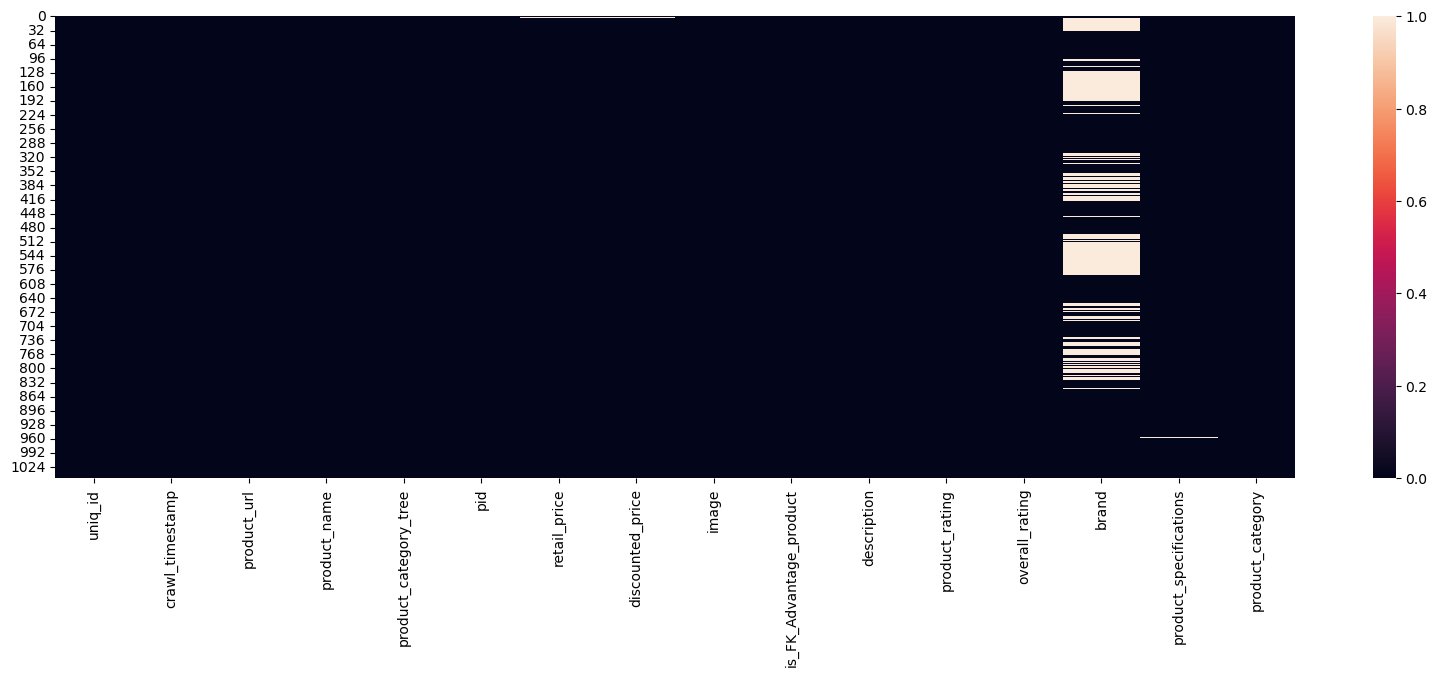

In [13]:
# Visualisation du taux de remplissage du dataframe
fig, ax= plt.subplots(1,1,figsize=(20,6))
sns.heatmap(df_0.isna())

In [14]:
df_1= df_0[['description','product_category']]

In [15]:
df_1['description'].to_frame().head(2)

,description
0,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multico..."
1,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable ..."


In [16]:
df_1['description'].to_frame().tail(2)

,description
1048,Buy Wallmantra Medium Vinyl Sticker Sticker for Rs.1333 online. Wallmantra Medium Vinyl Sticker Sticker at best pric...
1049,Buy Uberlyfe Large Vinyl Sticker for Rs.595 online. Uberlyfe Large Vinyl Sticker at best prices with FREE shipping &...


In [17]:
df_1['description'].to_frame().sample(10)

,description
164,Rockmantra Colorful Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t\r\n\t\t\tGive a thril...
789,Buy Love Baby Cartoon Set of Towels at Rs. 425 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!
337,Flipkart.com: Buy Arabian Nights Evolve Combo Set online only for Rs. 398 from Flipkart.com. Only Genuine Products. ...
54,Key Features of JRB 1033 Smallest Mobile Powered By OTG Enabled Android Smart Phone Portable 1033 USB Fan System Req...
813,Buy Raymond Abstract Double Blanket Green at Rs. 1999 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On...
314,"Vincent Valentine Paris Set of Dark Fire, Dark Fire & Majesty Deodorants Combo Set (Set of 3)\r\n ..."
828,Casotec Lightning 272017A USB USB Cable (Purple)\r\n Price: Rs. 299\r\n\t\t\t\t\r\n\t\t\tCas...
77,"Giorgio Armani SMOOTH SILK LIP PENCIL 12 (Soyeux 12) Price: Rs. 1,710 Glides on smoothly and defines the look of you..."
827,Buy meSleep Abstract Cushions Cover at Rs. 599 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!
408,Wild Stone Deodorant No-22 Combo Set (Set of 2)\r\n Price: Rs. 356\r\n\t\t\t\t\r\n\t\t\tLong...


In [18]:
df_1['description'].to_frame().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1050 non-null   object
dtypes: object(1)
memory usage: 8.3+ KB


In [19]:
df_1['description'].to_frame().duplicated().sum()

0

In [20]:
df_1['description'].to_frame().describe()

,description
count,1050
unique,1050
top,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multico..."
freq,1


C:\Users\marat\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='description'>

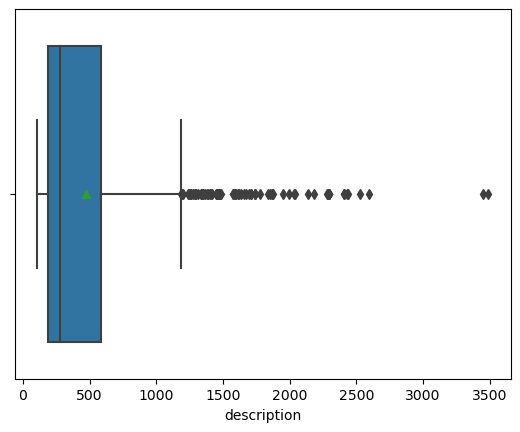

In [21]:
tmp= df_1['description'].to_frame().description.str.len()
sns.boxplot(tmp,showmeans=True)

C:\Users\marat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='description', ylabel='Density'>

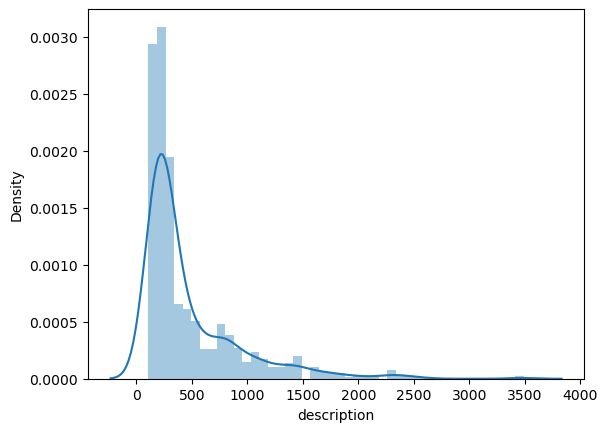

In [22]:
sns.distplot(tmp)

Possibilité d'ajouter une colonne avec le nombre de caractères: df['x_length_text']= tmp

#### Exploration du corpus et documents:

In [23]:
# On sélectionne quelques documents du corpus 
df_1_samp = df_1['description'].to_frame().sample(10)
df_1_samp

,description
252,Buy Metallino Kadhai NA L for Rs.721 online. Metallino Kadhai NA L at best prices with FREE shipping & cash on deliv...
999,"Key Features of Balaji Velvet Sofa Cover 5 Seater Sofa Cover 3+1+1,Balaji Velvet Sofa Cover (Brown Pack of 6) Price:..."
822,Key Features of Bharatcraft Wall Hanging Of Lord Ganesha On A Creative Leaf Showpiece - 34.29 cm Brass Height - 34...
1033,"Key Features of Aroma Comfort Polyester Dark Blue Plain Eyelet Window Curtain Height: 152 cm Width: 121 cm,Specifica..."
780,Perucci PCC-501C Decker Analog Watch - For Men - Buy Perucci PCC-501C Decker Analog Watch - For Men PCC-501C Onli...
826,Timex TI000I70600 Analog Watch - For Men - Buy Timex TI000I70600 Analog Watch - For Men TI000I70600 Online at Rs....
740,Buy Pindia Apple Macbook Pro 13 13.3 Inch Mb990hn/A & Mb990ll/A USB Yellow Anti-dust Plug for Rs.299 online. Pindia ...
558,Times SD_147 Casual Analog Watch - For Women - Buy Times SD_147 Casual Analog Watch - For Women SD_147 Online at ...
298,Specifications of JayEnterprise Plastic Hand Juicer (Multicolor) General Brand JayEnterprise Model Number Hand_Juice...
856,Lifestyle-You IG43_04 USB USB Fan (Yellow)\r\n Price: Rs. 499\r\n\t\t\t\t\r\n\t\t\tPortable ...


In [24]:
# On visualise les documents séléctionnés:
for idx, ser in df_1_samp.iterrows() :
    print(ser["description"])
    print("\n")

Buy Metallino Kadhai NA L for Rs.721 online. Metallino Kadhai NA L at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.


Key Features of Balaji Velvet Sofa Cover 5 Seater Sofa Cover 3+1+1,Balaji Velvet Sofa Cover (Brown Pack of 6) Price: Rs. 3,599 Balaji Textiles Is The Leading Branding Manufacturer And Retailer Company Of Handloom. Its Deals In Heavy Look Sofa Cover With Reasonable Prices. Balaji Textiles Mills Have More Than 700 Designer Sofa Covers, Which Have Lots Of Colors And Designing Like- Floral, Geometric And Others.....,Specifications of Balaji Velvet Sofa Cover (Brown Pack of 6) General Brand Balaji Suitable For Guest-Room, Living-Room Model Number BTS1239B01 Shade Brown Type Sofa Material Velvet Pattern Floral Wash Care Instructions Only Dry Clean And Easy Wash Color Brown Dimensions Weight 2.8 kg Seat Width 58 cm Height 68 cm Width 58 cm Depth 1 cm Seat Height 68 cm Back Hieght 68 cm In the Box Sales Package A Set Of 

In [25]:
#builtin
import os, sys, time, random

# NLP
#NLTK Tokenizer Package: Tokenizers divide strings into lists of substrings.
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


#viz
import seaborn as sns
import matplotlib.pyplot as plt

# Python Imaging Library, that enabled Python to deal with images
from PIL import Image

#simple and efficient tool to parallelize Pandas operations on all available CPUs
from pandarallel import pandarallel

#import spacy
#from wordcloud import Wordcloud

#### Downloads:

In [26]:
"""NLTK's Wordnet and Open Multilingual Wordnet ("OMW") share a common function, 
but produce output of differing types"""
nltk.download('omw-1.4')

""" The WordNet is a part of Python's Natural Language Toolkit. It is a large 
word database of English Nouns, Adjectives, Adverbs and Verbs."""
nltk.download('wordnet')

""" Stop words are a set of commonly used words in a language. Examples of stop words in English are
“a”, “the”, “is”, “are” and etc"""
nltk.download('stopwords')

nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marat\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\marat\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### On travail sur un simple document:

In [27]:
doc= df_1['description'].to_frame().description.sample(1)
doc= doc.values[0]
doc

'Buy TP-LINK TL-WR702N 150Mbps Wireless N Nano Router only for Rs. 1599 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!'

In [28]:
#lower
doc= doc.lower()
doc

'buy tp-link tl-wr702n 150mbps wireless n nano router only for rs. 1599 from flipkart.com. only genuine products. 30 day replacement guarantee. free shipping. cash on delivery!'

#### word_tokenize

In [29]:
#Tokenize
tokens= word_tokenize(doc)

In [30]:
len(tokens)

32

In [31]:
len(set(tokens))

27

In [32]:
def display_tokens_info(tokens):
    """ display info about corpus"""
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

#### wordpunct_tokenize

In [33]:
# another tokenize:
tokens= wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 38, nb tokens uniques 31
['buy', 'tp', '-', 'link', 'tl', '-', 'wr702n', '150mbps', 'wireless', 'n', 'nano', 'router', 'only', 'for', 'rs', '.', '1599', 'from', 'flipkart', '.', 'com', '.', 'only', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee']


In [34]:
#stop_words
stop_words= set(stopwords.words('english'))
print(stop_words)

{'when', 'did', 'because', 'with', 'so', 'above', 'being', 'my', 'will', 'about', 'ma', 'on', "you'd", 'that', 'do', 'ours', 'doesn', 's', 'should', "didn't", 'under', 'didn', 'mustn', 'between', 're', 'theirs', "you're", 'but', 'from', 'again', "won't", 'who', 'isn', 'doing', 'in', 'very', 'weren', 'whom', "aren't", 'he', 'the', 'while', 'further', 'itself', "shan't", 'myself', 'yourself', 'were', 'couldn', 'they', 'himself', 'mightn', 'what', 'ain', 'during', 'over', 'out', "hasn't", "don't", 'hers', 'if', 'for', 'her', 'by', 'up', 'here', 'then', 'shan', 'haven', "mustn't", "it's", "isn't", 'which', 'off', 'where', 'won', 'an', 'than', 'each', 'ourselves', 'down', 'as', 'or', 'there', 'such', 'them', 'don', 'o', 'needn', 'i', 'just', 'now', "you'll", 'him', 'shouldn', 'after', 'can', 'before', 'its', 't', 'll', 'was', 'too', 'we', 'hasn', 'these', 'y', "wouldn't", 'is', 'below', 'themselves', 'how', 'same', "needn't", 'against', 'are', 'does', 'most', 'to', 've', 'it', "that'll", 'y

In [35]:
tokens= [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 33, nb tokens uniques 27
['buy', 'tp', '-', 'link', 'tl', '-', 'wr702n', '150mbps', 'wireless', 'n', 'nano', 'router', 'rs', '.', '1599', 'flipkart', '.', 'com', '.', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.', 'free', 'shipping', '.']


#### RegexpTokenizer

In [36]:
# another tokenizer
tokenizer= RegexpTokenizer(r"\w+")
tokens= tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 29, nb tokens uniques 28
['buy', 'tp', 'link', 'tl', 'wr702n', '150mbps', 'wireless', 'n', 'nano', 'router', 'only', 'for', 'rs', '1599', 'from', 'flipkart', 'com', 'only', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'on', 'delivery']


In [37]:
# remove stopwords
tokens= [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 24, nb tokens uniques 24
['buy', 'tp', 'link', 'tl', 'wr702n', '150mbps', 'wireless', 'n', 'nano', 'router', 'rs', '1599', 'flipkart', 'com', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery']


#### Définition de la fonction process_text_0(): Tokenizer + lower

In [38]:
def process_text_0(doc,rejoin=False):
    """Basic function of text processing"""
    #lower
    doc= doc.lower().strip()
    
    #Tokenize
    tokenizer= RegexpTokenizer(r"\w+")
    raw_tokens_list= tokenizer.tokenize(doc)
      
    if rejoin: 
        return " ".join(raw_tokens_list)
    
    return raw_tokens_list

#### Définition de la fonction process_text_1(): Tokenizer + lower + cleaned (stop words)

In [39]:
def process_text_1(doc,rejoin=False):
    """Basic function of text processing"""
    #lower
    doc= doc.lower().strip()
    
    #Tokenize
    tokenizer= RegexpTokenizer(r"\w+")
    raw_tokens_list= tokenizer.tokenize(doc)
    
    #stop_words
    cleaned_tokens_list= [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin: 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [40]:
tokens= process_text_1(doc)

In [41]:
display_tokens_info(tokens)

nb tokens 24, nb tokens uniques 24
['buy', 'tp', 'link', 'tl', 'wr702n', '150mbps', 'wireless', 'n', 'nano', 'router', 'rs', '1599', 'flipkart', 'com', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery']


#### Application sur tout le corpus (colonne description):

In [42]:
raw_corpus1= " ".join(df_1.description.values)
raw_corpus1[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [43]:
len(raw_corpus1)

498561

In [44]:
# process the corpus
corpus= process_text_1(raw_corpus1)
display_tokens_info(corpus)

nb tokens 61786, nb tokens uniques 5966
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']


In [45]:
#value counts
tmp= pd.Series(corpus).value_counts()
tmp

rs          911
products    631
free        618
buy         581
delivery    567
           ... 
656           1
motif         1
hargunz       1
driver        1
pgrn01        1
Length: 5966, dtype: int64

In [46]:
# Top 30 des tokens les plus fréquents:
tmp.head(30)

rs                911
products          631
free              618
buy               581
delivery          567
genuine           564
cash              564
shipping          564
replacement       559
1                 554
cm                543
day               540
30                498
flipkart          481
com               473
guarantee         471
online            396
features          395
specifications    371
price             352
watch             330
color             328
mug               327
baby              320
pack              317
material          312
set               310
type              304
cotton            299
box               292
dtype: int64

In [47]:
tmp.tail(30)

cuteness       1
babybucket     1
twist          1
crew           1
commendable    1
sleeved        1
132            1
wants          1
indha          1
miss           1
opportunity    1
grab           1
shrikant       1
209            1
trendiest      1
1183           1
barrage        1
479            1
turtle         1
girlie         1
royalblue      1
galaxy         1
onboard        1
burning        1
cpu            1
656            1
motif          1
hargunz        1
driver         1
pgrn01         1
dtype: int64

In [48]:
tmp.describe()

count    5966.000000
mean       10.356353
std        39.975073
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

C:\Users\marat\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

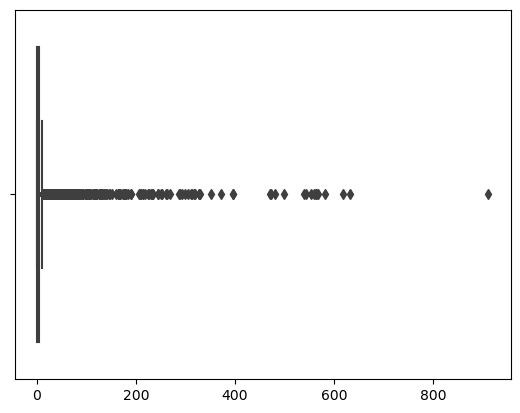

In [49]:
sns.boxplot(tmp)

#### Liste des tokens rares:

In [50]:
# Uniques words --> not usefull
tmp= pd.Series(corpus).value_counts()
list_unique_words= tmp[tmp==1]
list_unique_words[:30]

thigh             1
voice             1
240v              1
flamingo          1
vegetable         1
enzyme            1
luxarious         1
of1               1
everyday          1
tinker            1
humor             1
soup              1
99gems            1
eternity001007    1
5692              1
gurantee          1
sauce             1
88tbtsh0385       1
applying          1
wkhs0164s         1
compaingns        1
mitered           1
foremost          1
buffet            1
raw               1
rani              1
units             1
1x15              1
stencils          1
avasthi           1
dtype: int64

In [51]:
len(list_unique_words)

1940

In [52]:
list_unique_words= list(list_unique_words.index)
list_unique_words[:30]

['thigh',
 'voice',
 '240v',
 'flamingo',
 'vegetable',
 'enzyme',
 'luxarious',
 'of1',
 'everyday',
 'tinker',
 'humor',
 'soup',
 '99gems',
 'eternity001007',
 '5692',
 'gurantee',
 'sauce',
 '88tbtsh0385',
 'applying',
 'wkhs0164s',
 'compaingns',
 'mitered',
 'foremost',
 'buffet',
 'raw',
 'rani',
 'units',
 '1x15',
 'stencils',
 'avasthi']

In [53]:
#save it for later:
tmp= pd.DataFrame({"words" : list_unique_words})
tmp.to_csv("unique_words_1.csv",index=False)

#### Cleaning function 2:

In [54]:
def process_text_2(doc,rejoin=False,list_rare_words= None, min_len_word= 3, force_is_alpha= True):
    """cf process_text_1 but with list_rare_words, min_len_word, force_is_alpha    
    arguments:
    ---------
    doc: str: the document to process
    opts args:
    ----------
    rejoin: bool: if True return a string else return the list of tokens 
    list_rare_words: list: a list of rare words to exclude
    min_len_word: int: if 1: excldue all tokens with a numeric character
    return: 
    -------
    a string (if rejoin is True) or a list of tokens
    """
    
    #lis of unique words
    if not list_rare_words:
        list_rare_words= []
        
    #lower
    doc= doc.lower().strip()
    
    #Tokenize
    tokenizer= RegexpTokenizer(r"\w+")
    raw_tokens_list= tokenizer.tokenize(doc)
    
    # classics stop_words
    cleaned_tokens_list= [w for w in raw_tokens_list if w not in stop_words]
    
    ##############################
    # no rare tokens
    non_rare_tokens= [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # no more len words
    more_than_N= [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    # only alphabetics chars
    if force_is_alpha:
        alpha_tokens= [w for w in more_than_N if w.isalpha()]
    else: 
        alpha_tokens = more_than_N
          
    ###############################
    
    if rejoin: 
        return " ".join(alpha_tokens)
    
    return alpha_tokens

In [55]:
raw_corpus1= " ".join(df_1.description.values)
corpus_cleaned_2= process_text_2(raw_corpus1)

In [56]:
print(len(raw_corpus1))
print(len(set(raw_corpus1)))

498561
101


In [57]:
display_tokens_info(corpus_cleaned_2)

nb tokens 52969, nb tokens uniques 4781
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester']


#### Stem & Lem:
Stemming is the process of producing the morphological variants of root/base word. Lemmatization brings context to the words.

In [58]:
doc= df_1.description.sample(1).values[0]
doc

'Buy Asus RP-N53 Dual-Band Wireless-N600 Range Extender only for Rs. 8000 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!'

In [59]:
tokenizer= RegexpTokenizer(r"\w+")
tokens= tokenizer.tokenize(doc.lower())
print(tokens)

['buy', 'asus', 'rp', 'n53', 'dual', 'band', 'wireless', 'n600', 'range', 'extender', 'only', 'for', 'rs', '8000', 'from', 'flipkart', 'com', 'only', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'on', 'delivery']


In [60]:
# avec PorterStemmer()
trans= PorterStemmer()
trans_text= [trans.stem(i) for i in tokens]
print(trans_text)

['buy', 'asu', 'rp', 'n53', 'dual', 'band', 'wireless', 'n600', 'rang', 'extend', 'onli', 'for', 'rs', '8000', 'from', 'flipkart', 'com', 'onli', 'genuin', 'product', '30', 'day', 'replac', 'guarante', 'free', 'ship', 'cash', 'on', 'deliveri']


In [61]:
# avec WordNetLemmatizer()
trans= WordNetLemmatizer()
trans_text= [trans.lemmatize(i) for i in tokens]
print(trans_text)

['buy', 'asus', 'rp', 'n53', 'dual', 'band', 'wireless', 'n600', 'range', 'extender', 'only', 'for', 'r', '8000', 'from', 'flipkart', 'com', 'only', 'genuine', 'product', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'on', 'delivery']


#### Cleaning function 3: 

In [62]:
def process_text_3(doc,rejoin=False, lem_or_stem= "stem", list_rare_words= None, min_len_word= 3, force_is_alpha= True):
    """cf process_text_2 but with stem & lem   
    arguments:
    ---------
    doc: str: the document to process
    opts args:
    ----------
    rejoin: bool: if True return a string else return the list of tokens 
    lem_or_stem: str: if if lem do lemmentize else stemmentize
    list_rare_words: list: a list of rare words to exclude
    min_len_word: int: if 1: excldue all tokens with a numeric character
    return: 
    -------
    a string (if rejoin is True) or a list of tokens
    """
    
    #lis of unique words
    if not list_rare_words:
        list_rare_words= []
        
    #lower
    doc= doc.lower().strip()
    
    #Tokenize
    tokenizer= RegexpTokenizer(r"\w+")
    raw_tokens_list= tokenizer.tokenize(doc)
    
    # classics stop_words
    cleaned_tokens_list= [w for w in raw_tokens_list if w not in stop_words]
    
     # no rare tokens
    non_rare_tokens= [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # no more len words
    more_than_N= [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    # only alphabetics chars
    if force_is_alpha:
        alpha_tokens= [w for w in more_than_N if w.isalpha()]
    else: 
        alpha_tokens = more_than_N
          
    ###############################
    # stem or lem
    if lem_or_stem == "lem" :
        trans= WordNetLemmatizer()
        trans_text= [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans= PorterStemmer()
        trans_text= [trans.stem(i) for i in alpha_tokens]
    
    ###############################
    
    if rejoin: 
        return " ".join(trans_text)
    
    return trans_text

In [63]:
raw_corpus1= " ".join(df_1.description.values)
corpus_cleaned_3= process_text_3(doc,rejoin=False, lem_or_stem= "lem", list_rare_words= list_unique_words, min_len_word= 3, force_is_alpha= True)

In [64]:
corpus_cleaned_3

['buy',
 'asus',
 'dual',
 'band',
 'wireless',
 'range',
 'extender',
 'flipkart',
 'com',
 'genuine',
 'product',
 'day',
 'replacement',
 'guarantee',
 'free',
 'shipping',
 'cash',
 'delivery']

#### Only english words:


In [65]:
pd.Series(words.words()).sample(10)

227471            velar
103331         lacelike
121966      mythopoetic
17151           Babesia
231771          whicker
149450        podosperm
55226      disimitation
61718     encumberingly
173555       Sarawakese
122452         narcosis
dtype: object

In [66]:
len(words.words())

236736

In [67]:
len(set(words.words()))

235892

In [68]:
eng_words= [i.lower() for i in words.words()]
eng_words[:10]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron']

In [69]:
len(set(eng_words))

234377

In [70]:
lm= WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']


In [71]:
st= PorterStemmer()
eng_words_st = [st.stem(i) for i in eng_words]
display_tokens_info(eng_words_st)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']


#### Cleaning function 4:

In [72]:
def process_text_4(doc,rejoin=True, lem_or_stem= "stem", list_rare_words= None, min_len_word= 3, force_is_alpha= True, eng_words= None):
    """cf process_text_3 but with selection of only english words
    arguments:
    ---------
    doc: str: the document to process
    opts args:
    ----------
    rejoin: bool: if True return a string else return the list of tokens 
    lem_or_stem: str: if if lem do lemmentize else stemmentize
    list_rare_words: list: a list of rare words to exclude
    min_len_word: int: if 1: excldue all tokens with a numeric character
    return: 
    -------
    a string (if rejoin is True) or a list of tokens
    """
    
    #lis of unique words
    if not list_rare_words:
        list_rare_words= []
        
    #lower
    doc= doc.lower().strip()
    
    #Tokenize
    tokenizer= RegexpTokenizer(r"\w+")
    raw_tokens_list= tokenizer.tokenize(doc)
    
    # classics stop_words
    cleaned_tokens_list= [w for w in raw_tokens_list if w not in stop_words]
    
    # no rare tokens
    non_rare_tokens= [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    # no more len words
    more_than_N= [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    # only alphabetics chars
    if force_is_alpha:
        alpha_tokens= [w for w in more_than_N if w.isalpha()]
    else: 
         alpha_tokens = more_than_N
          
    # stem or lem
    if lem_or_stem == "lem" :
        trans= WordNetLemmatizer()
        trans_text= [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans= PorterStemmer()
        trans_text= [trans.stem(i) for i in alpha_tokens]
    
    ###############################
    # in english
    if eng_words:
        eng_text = [i for i in trans_text if i in eng_words]
    else:
        eng_text= trans_text
    ###############################
    
    if rejoin: 
        return " ".join(eng_text)
    
    return eng_text

In [73]:
raw_corpus1= " ".join(df_1.description.values)
corpus_cleaned_4= process_text_4(raw_corpus1,rejoin=False, lem_or_stem= "stem", list_rare_words= list_unique_words, min_len_word= 3, force_is_alpha= True, eng_words= None)

In [74]:
display_tokens_info(corpus_cleaned_4)

nb tokens 51562, nb tokens uniques 2748
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']


In [75]:
df_1["clean_desc"]= df_1.description.apply(process_text_4)

C:\Users\marat\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_1.head()

,description,product_category,clean_desc
0,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multico...",Home Furnishing,key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyel...
1,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable ...",Baby Care,specif sathiya cotton bath towel bath towel red yellow blue bath towel featur machin washabl ye materi cotton design...
2,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face To...",Baby Care,key featur eurospa cotton terri face towel set size small height inch gsm eurospa cotton terri face towel set piec f...
3,Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding &...,Home Furnishing,key featur santosh royal fashion cotton print king size doubl bedsheet royal bedsheet perfact wed gift specif santos...
4,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King si...",Home Furnishing,key featur jaipur print cotton floral king size doubl bedsheet cotton jaipur print cotton floral king size doubl bed...


In [77]:
df_1.isna().mean()

description         0.0
product_category    0.0
clean_desc          0.0
dtype: float64

## Bag of words: CountVectorizer - Tf-idf

In [78]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

### Preprocessing: 

In [79]:
l_cat = list(set(df_1['product_category']))
print("catégories : ", l_cat)
y_cat_num = [(l_cat.index(df_1.iloc[i]['product_category'])) for i in range(len(df_1))]

# with LabelEncoder():
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#df1["product_category"] = le.fit_transform(df1["product_category"])
#y_cat_num= list(df1["product_category"] )

catégories :  ['Home Furnishing ', 'Computers ', 'Baby Care ', 'Kitchen & Dining ', 'Watches ', 'Beauty and Personal Care ', 'Home Decor & Festive Needs ']


In [80]:
# Définition de fonctions communes

import time
from sklearn import manifold, decomposition

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    
    # Réduction de dimension par PCA:
    print("Dimensions dataset avant réduction PCA : ", features.shape)
    
    pca = decomposition.PCA(n_components=0.99)
    feat_pca = pca.fit_transform(features)
    print("Dimensions dataset après réduction PCA : ", feat_pca.shape)
    
    # T-distributed Stochastic Neighbor Embedding
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(feat_pca)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# Visualisation du Tsne selon les vraies catégories et selon les cluster
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des descriptions par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des descriptions par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [81]:
# création du bag of words (CountVectorizer et Tf-idf)
# CountVectorizer: Convert a collection of text documents to a matrix of token counts.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#création des modèles CountVectorizer et Tf-idf
#The default min_df is 1, which means "ignore terms that appear in less than 1 document". 
#Thus, the default setting does not ignore any terms.
#max_df = 0.95 means "ignore terms that appear in more than 95% of the documents".
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

# nom de colonne de df avec les documents prétraités
feat = 'clean_desc'

#fit
cv_fit = cvect.fit(df_1[feat])
ctf_fit = ctf.fit(df_1[feat])

#transform
cv_transform = cvect.transform(df_1[feat]) 
# On covertit sparse matrix to an array
cv_transform= cv_transform.toarray()

#transform
ctf_transform = ctf.transform(df_1[feat])  
# On covertit sparse matrix to an array
ctf_transform= ctf_transform.toarray()

### Execution du modèle:

In [109]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI_tfidf, X_tsne_tfidf, labels_tfidf = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------
Dimensions dataset avant réduction PCA :  (1050, 3720)
Dimensions dataset après réduction PCA :  (1050, 523)
ARI :  0.4136 time :  17.0

Tf-idf : 
--------
Dimensions dataset avant réduction PCA :  (1050, 3720)
Dimensions dataset après réduction PCA :  (1050, 769)
ARI :  0.4401 time :  16.0


### Graphiques:

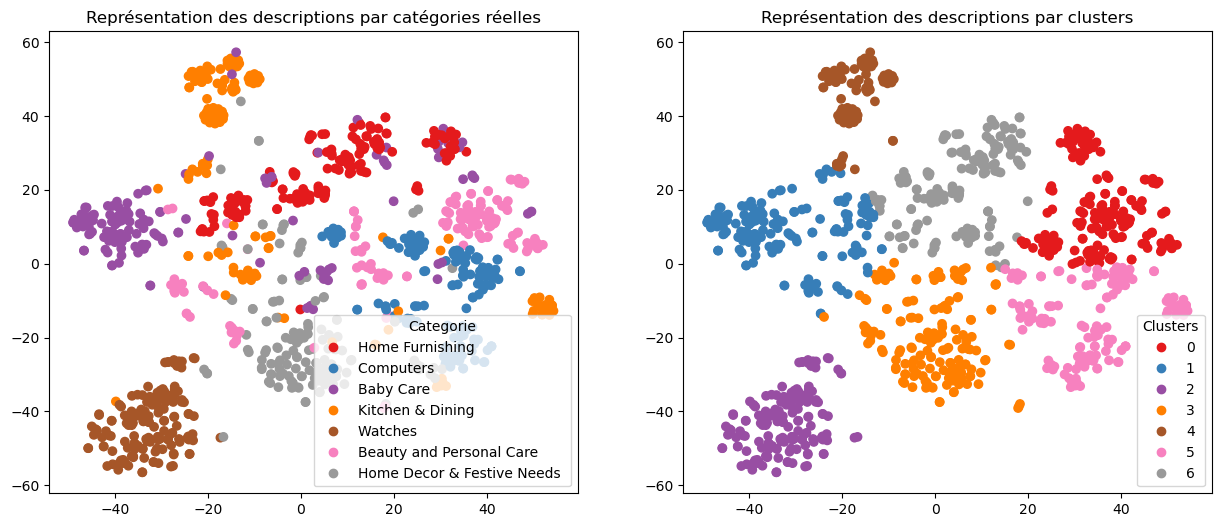

ARI :  0.4401


In [110]:
 # tfidf
 TSNE_visu_fct(X_tsne_tfidf, y_cat_num, labels_tfidf, ARI_tfidf)

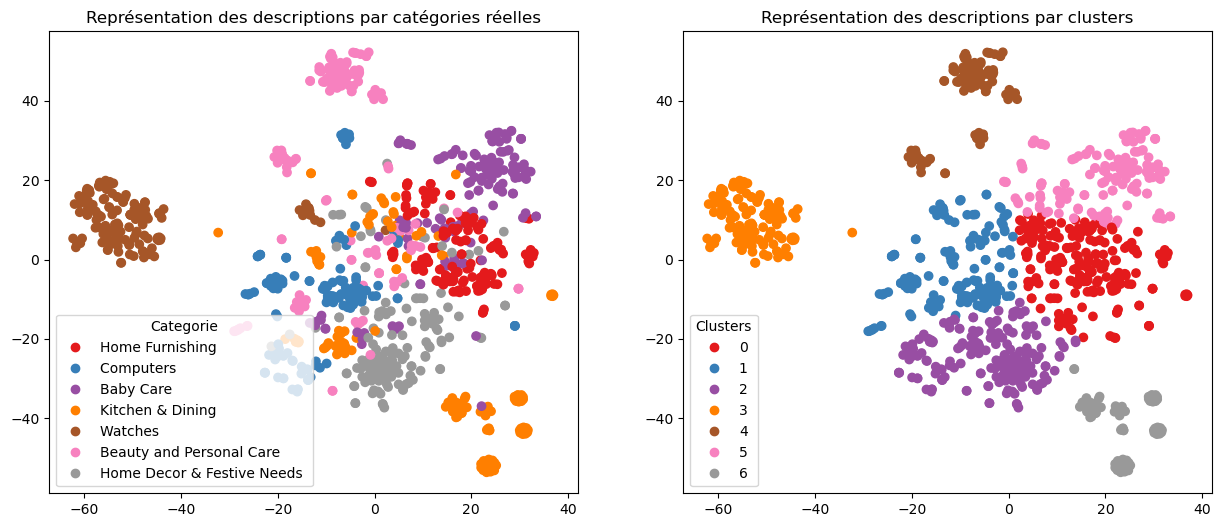

ARI :  0.4136


In [111]:
 # CountVectorizer 
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Word2Vec

In [84]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim


C:\Users\marat\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\marat\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\marat\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\marat\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

### Création du modèle Word2Vec

In [85]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df_1['clean_desc'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [86]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 3802
Word2Vec trained


In [87]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3803


### Création de la matrice d'embedding

In [88]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3803, 300)


### Création du modèle d'embedding

In [89]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 24, 300)           1140900   
_________________________________________________________________
global_average_pooling1d (Gl (None, 300)               0         
Total params: 1,140,900
Trainable params: 1,140,900
Non-trainable params: 0
_________________________________________________________________


In [90]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

(1050, 300)

In [91]:
ARI, X_tsne, labels = ARI_fct(embeddings)

Dimensions dataset avant réduction PCA :  (1050, 300)
Dimensions dataset après réduction PCA :  (1050, 55)
ARI :  0.2794 time :  11.0


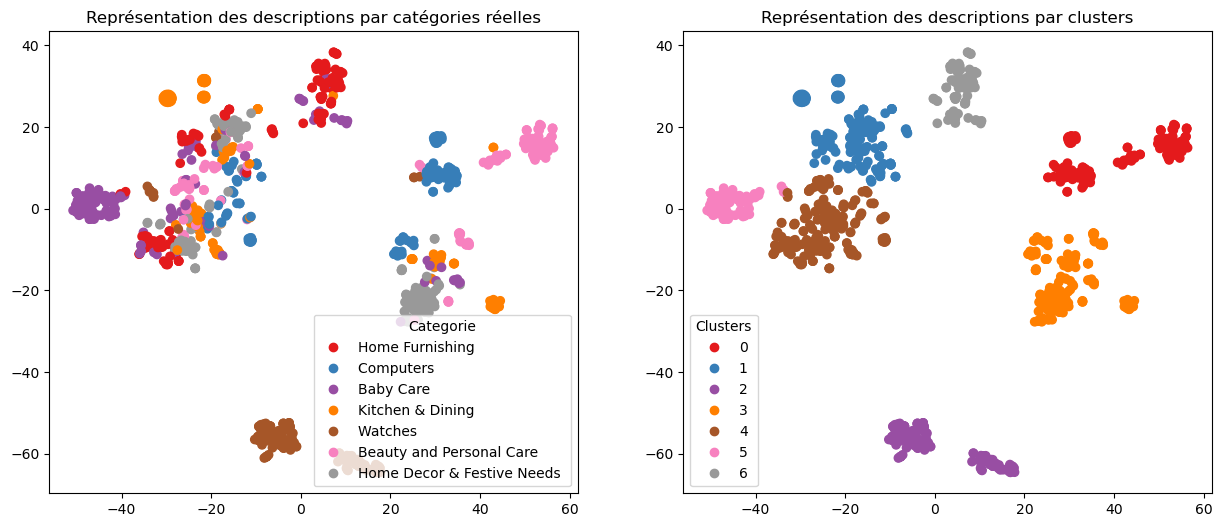

ARI :  0.2794


In [92]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [93]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [94]:
# Bert
import os
import transformers
from transformers import *

In [95]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.3.0
2.3.0
Num GPUs Available:  0
True


### Fonctions communes

In [96]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [97]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_1['clean_desc'].to_list()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [98]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
temps traitement :  185.0


In [99]:
ARI, X_tsne, labels = ARI_fct(features_bert)

Dimensions dataset avant réduction PCA :  (1050, 768)
Dimensions dataset après réduction PCA :  (1050, 296)
ARI :  0.335 time :  13.0


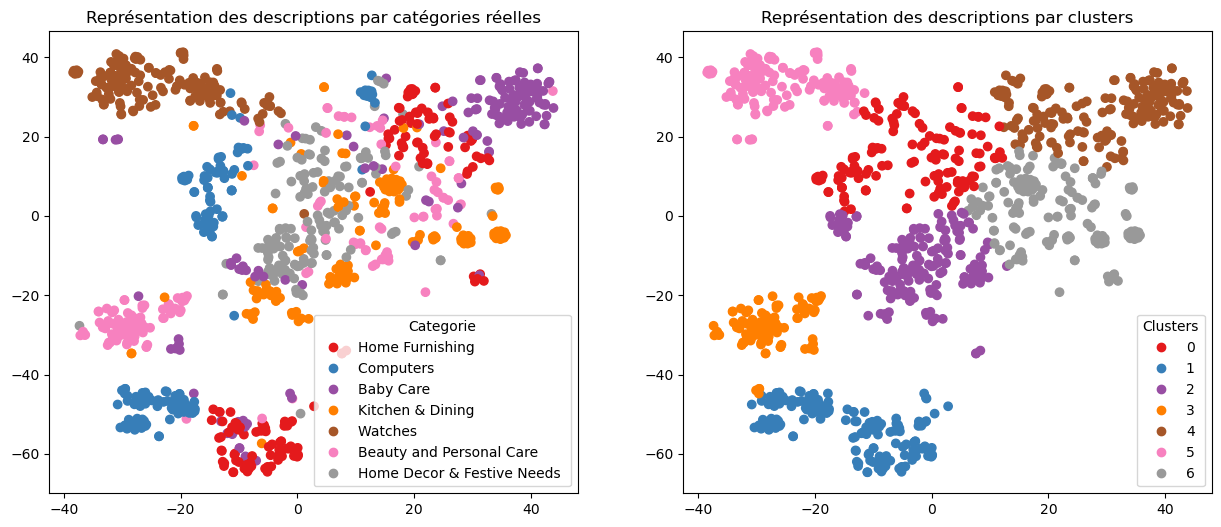

ARI :  0.335


In [100]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## USE - Universal Sentence Encoder

In [101]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

In [102]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.3.0
2.3.0
Num GPUs Available:  0
True


In [103]:
import tensorflow_hub as hub
os.environ['TFHUB_CACHE_DIR'] = 'C:/Users/marat/.cache' #folder with access
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


INFO:absl:Using C:/Users/marat/.cache to cache modules.


In [104]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [105]:
batch_size = 10
sentences = df_1['clean_desc'].to_list()

In [106]:
features_USE = feature_USE_fct(sentences, batch_size)

In [107]:
ARI, X_tsne, labels = ARI_fct(features_USE)

Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 307)
ARI :  0.4275 time :  13.0


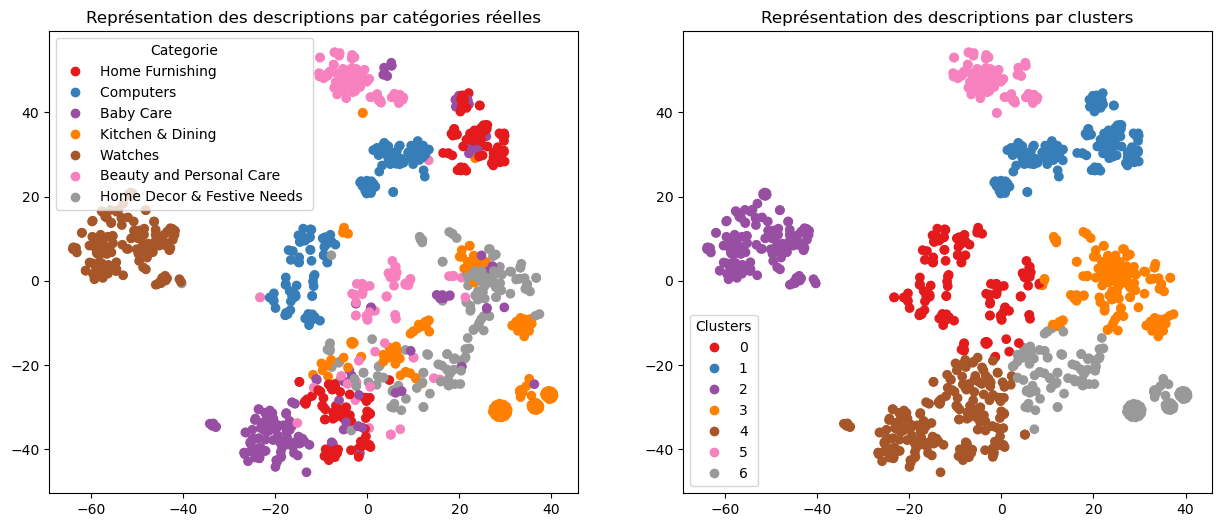

ARI :  0.4275


In [108]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)